In [121]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
#import data. No dependent variable. Dont need customer ID.
dataset = pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[:,1:].values

In [123]:
from sklearn.preprocessing import StandardScaler
scaler_income = StandardScaler()
scaled_income = scaler_income.fit_transform(X[:,2].reshape(-1,1))
scaler_spend = StandardScaler()
scaled_spend = scaler_spend.fit_transform(X[:,3].reshape(-1,1))

In [124]:
from sklearn.preprocessing import LabelEncoder
encoder_sex = LabelEncoder()
encoded_sex = encoder_sex.fit_transform(X[:,0])

In [125]:
from sklearn.cluster import KMeans
cluster_income_spend = KMeans(n_clusters=4)
cluster_income_spend.fit(np.concatenate((scaled_income, scaled_spend),axis=1))
y_kmeans=cluster_income_spend.predict(np.concatenate((scaled_income, scaled_spend),axis=1))

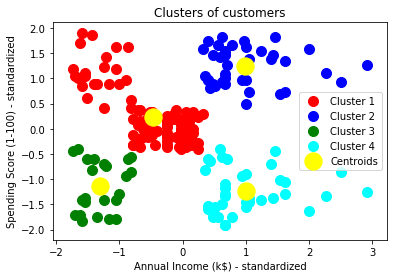

In [151]:
plt.scatter(scaled_income[y_kmeans == 0], scaled_spend[y_kmeans == 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_income[y_kmeans == 1], scaled_spend[y_kmeans == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_income[y_kmeans == 2], scaled_spend[y_kmeans == 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_income[y_kmeans == 3], scaled_spend[y_kmeans == 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(cluster_income_spend.cluster_centers_[:, 0], cluster_income_spend.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$) - standardized')
plt.ylabel('Spending Score (1-100) - standardized')
plt.legend()
plt.show()

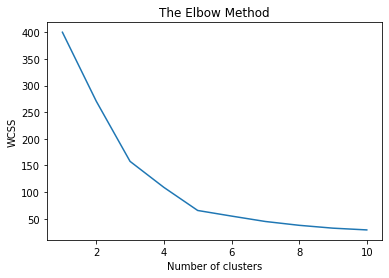

In [153]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(np.concatenate((scaled_income, scaled_spend),axis=1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

(50, 4)